# Lab8
# Text Classification and POS Tagging using NLTK

## 1.Introduction

In this Lab, we will explore how to implement POS Tagging by using NLTK technology.

First of all, we will have a simple recap on Tokenization techniques using NLTK.

Secondly, we will explore two fundamental processes in word-level progressing before to proceed POS Tagging: Stemming and Stop-word Removal, in which will introduce two types of stemming techniques: Porter Stemmer and Snowball Stemmer.

After that, we will explore how these techniques can be inte-grated to WordCloud – a commonly used techniques in data visualization. After that, we will explore the main theme of this chapter – POS Tagging using NLTK technology, with the introduction of the PENN Treebank Tagset (as discussed in Chapter 3) and explore to how create your own POS Tagger.   

## 2 Tokenization (re-visit)

In most NLP tasks, we slice the text sentences into sub-units first and then map them into vectors. Then these vectors are fed into the model for encoding. Finally, the output is sent to the downstream task to further obtain the final result. NLTK provides various methods to slice the text into subunits, i.e. different types of tokenizers. We will use the Twitter example corpus in NLTK to see how to tokenize the comments of tweets.

So, let's start:
1. Import NLTK package
2. Import twitter sample data
3. List out the fileids
4. Get the twitter string list
5. List out the first 15 twitters
6. Tokenize the twitter

In [79]:
# Import NLTK
import nltk

# Download twitter_samples
nltk.download('twitter_samples')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
# Import twitter samples from NTLK corpus (twtr)
from nltk.corpus import twitter_samples as twtr

In [81]:
# Display Field IDs
twtr.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [82]:
# Assign sample twitters (stwtr)
stwtr = twtr.strings('tweets.20150430-223406.json')

In [83]:
# Display the first 5 sample twitters
stwtr[:5]

['RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP',
 'VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY',
 'RT @LabourEoin: The economy was growing 3 times faster on the day David Cameron became Prime Minister than it is today.. #BBCqt http://t.co…',
 'RT @GregLauder: the UKIP east lothian candidate looks about 16 and still has an msn addy http://t.co/7eIU0c5Fm1',
 "RT @thesundaypeople: UKIP's housing spokesman rakes in £800k in housing benefit from migrants.  http://t.co/GVwb9Rcb4w http://t.co/c1AZxcLh…"]

In [84]:
# Import NLTK word tokenizer
from nltk.tokenize import word_tokenize as w_tok

In [85]:
# tokenize stwtr[4]
w_tok(stwtr[4])

['RT',
 '@',
 'thesundaypeople',
 ':',
 'UKIP',
 "'s",
 'housing',
 'spokesman',
 'rakes',
 'in',
 '£800k',
 'in',
 'housing',
 'benefit',
 'from',
 'migrants',
 '.',
 'http',
 ':',
 '//t.co/GVwb9Rcb4w',
 'http',
 ':',
 '//t.co/c1AZxcLh…']

To split text based on punctuation and white spaces, NLTK provides the
wordpunct_tokenize tokenizer. This will also tokenize the punctuation characters.

In [86]:
from nltk.tokenize import wordpunct_tokenize as wp_tok
wp_tok(stwtr[4])

['RT',
 '@',
 'thesundaypeople',
 ':',
 'UKIP',
 "'",
 's',
 'housing',
 'spokesman',
 'rakes',
 'in',
 '£',
 '800k',
 'in',
 'housing',
 'benefit',
 'from',
 'migrants',
 '.',
 'http',
 '://',
 't',
 '.',
 'co',
 '/',
 'GVwb9Rcb4w',
 'http',
 '://',
 't',
 '.',
 'co',
 '/',
 'c1AZxcLh',
 '…']

As you can see, compared with simple word tokenizer, not only words, some words between hyphens and other punctuation can also be tokenized by using this method. Besides, NLTK's regular expression (RegEx) tokenizer can be used to build custom tokenizers, like this:

In [87]:
# Import the RegEx tokenizer
from nltk import regexp_tokenize as rx_tok
rx_pattern1 = '\w+'
rx_tok(stwtr[4],rx_pattern1)

['RT',
 'thesundaypeople',
 'UKIP',
 's',
 'housing',
 'spokesman',
 'rakes',
 'in',
 '800k',
 'in',
 'housing',
 'benefit',
 'from',
 'migrants',
 'http',
 't',
 'co',
 'GVwb9Rcb4w',
 'http',
 't',
 'co',
 'c1AZxcLh']


In the previous code, a simple regular expression filtered out words that contained only alphanumeric characters, but not punctuation. In the following code, we will use another regular expression to de-tect and filter out both words containing alphanumeric characters and some of the punctuation marks.

In [88]:
# Create Rx pattern2 and perform the RX tokenize again
rx_pattern2 = '\w+|[!,\-,]'
rx_tok(stwtr[4],rx_pattern2)

['RT',
 'thesundaypeople',
 'UKIP',
 's',
 'housing',
 'spokesman',
 'rakes',
 'in',
 '800k',
 'in',
 'housing',
 'benefit',
 'from',
 'migrants',
 'http',
 't',
 'co',
 'GVwb9Rcb4w',
 'http',
 't',
 'co',
 'c1AZxcLh']

## 3 Stemming using NLTK

- After the sentences were splitted into words by using tokenization, go a step further to simplify and unify the words so that they become a base form or root form.
- This is essentially what "Stemming" means. Stemming is a technique or method of changing a word to its similar meaning as its "stem" or "root" form.

<img src="./Fig 12.1.jpg" width = "500" height = "" alt="note" align=center />


### 3.1 What is Stemming?

In many scenarios, by extracting the base or root form of a word, Stemming usually will remove the prefixes or suffixes from the words. Take the words: Computers, Computation, Computerization as example. Although these words have totally different spellings, they all shared the same concept which is related to the concept “compute”, so we set “comput” as the stem of these words.

As one can see, in many situation, stemming will try to remove the prefixes and suffixes such as ‘er”, “ion”, “ization” in order to generate the root forms.


### 3.2Why we need Stemming?

The truth is: in many NLP applications, such as information extraction and topic summarization, we don’t need to extract the exact word of every single words appeared inside the document, but rather the “concept” or “notion” they repre-sent.

By doing so, we can on one hand save more computational power and can still preserve the overall meaning of the passage.

In order to achieve this, we try to apply the stemming technique in order to extract the “overall meaning” (or “base form”) of the words appeared instead of their distinct words.

Now, let’s look at how to perform stemming on text data.


### 3.3 How to perform Stemming?

The truth is: The NLTK provides excellent and convenient solution for us to im-plement stemming without any sophisticated programming.

Let's try the two most used Stemming methods in NLP: Porter Stemmer and Snowball Stemmer.

### 3.4 Porter Stemmer

Porter Stemming is the earliest stemming technique firstly used in 1980s.

The key procedure of Porter Stemmer is to remove common endings of words in order to parse them into generic forms. As this method is rather simple and effective, it is commonly used in many NLP applications.

So, let’s start performing some stemming.

First, import the Porter Stemmer from the NLTK library:


Now, first importing the PorterStemmer from the NLTK library. In the next line, we are initializing the stemmer.

In [89]:
# Import PorterStemmer as p_stem
from nltk.stem.porter import PorterStemmer as p_stem

Try to stem some words!

In [90]:
p_stem().stem("computer")

'comput'

<img src="./note.png" width = "" height = "" alt="note" align=left />

As shown in the example, PorterStemmer simply removes the suffix "er" when processing "computer" and gets "comput" which is obviously not correct. Hence this stemmer is very basic.

Next, try to stem your "dogs"! See what happen!

In [91]:
p_stem().stem("dogs")

'dog'

<img src="./note.png" width = "" height = "" alt="note" align=left />

For the above code, "dogs" is converted from plural to singular by removing the suffix "s" and converting it to "dog".

Try some more. How about "traditional"?

In [92]:
p_stem().stem("traditional")

'tradit'

<img src="./note.png" width = "" height = "" alt="note" align=left />

As we can see from the conversion of "traditional" above, Stemmer may output an invalid word when dealing with some special words. For example, if you remove the suffix "ional" from "traditional", you get "tradit". Obviously, "tradit" is not even a word in English. This is one of the shortcomings of using stemmer analyzer.

Next, let’s try some words in plural form. For the below example, I try to extract 26 words in plural form from starting word a – z and perform PorterStemming:

In [93]:
# Define some plural words
w_plu = ['apes','bags','computers','dogs','egos','frescoes','generous','hats','igloos','jungles',
        'kites','learners','mice','natives','openings','photos','queries','rats','scenes',
         'trees','utensils','veins','wells','xylophones','yoyos','zens']


In [94]:
from nltk.stem.porter import PorterStemmer as p_stem
w_sgl = [p_stem().stem(wplu) for wplu in w_plu]
print(' '.join(w_sgl))

ape bag comput dog ego fresco gener hat igloo jungl kite learner mice nativ open photo queri rat scene tree utensil vein well xylophon yoyo zen


<img src="./note.png" width = "" height = "" alt="note" align=left />

As one can see in most cases, Porter Stemming will try to remove the “s” or “es” to exact the “root form”, that might be resulted in the single form, such as “apes”, “bags”, “dogs”, etc. But in some cases, it will end up in some non-English words, such as “comput”, “gener”, “jungl” and “queri”.



# **Lab Task.1** Try to stem a paragraph from Adventures of Sherlock Holmes
In this workshop, we try to use stop word filtering technique for the literature Adventures of Sherlock Holmes:
1. Read the Adventures_Holmes.txt text file.
2. Save the content into a string object "holmes_doc".
3. Extract a paragraph from it and Tokenize this paragraph.
4. Using Porter Stemming and output the list of stemmed words.

### 3.5 Snowball Stemmer

As compared with Porter Stemmer, Snowball Stemmer provides some improve-ment in term of stemming results.

Besides, Snowball Stemmer provides multi-language stemming solution. One can check the languages being used by using the languages() method.

To invoke the Snowball Stemmer, import it from the NLTK package:

In [95]:
# Import Snowball Stemmer as s_stem
from nltk.stem.snowball import SnowballStemmer as s_stem

- To see what languages that Snowball stemmer supports.

In [96]:
# Display the s_stem language set
print(s_stem.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


As one can see, Snowball Stemmer provides a rich variety of solutions in various commonly used languages from Arabic to Swedish.

In [97]:
# Import Snowball Stemmer as s_stem and assign to English language
from nltk.stem.snowball import SnowballStemmer as s_stem
s_stem_ENG = s_stem(language="english")

<img src="./note.png" width = "" height = "" alt="note" align=left />

In the above code, first as usual we import the necessary packages. Here we are interested in the Snowball stemmer. Next, we initialize the stemmer. If you notice, here we are passing an additional argument to the stemmer called language and specifying English.

In [98]:
# Display the list of plural words
w_plu

['apes',
 'bags',
 'computers',
 'dogs',
 'egos',
 'frescoes',
 'generous',
 'hats',
 'igloos',
 'jungles',
 'kites',
 'learners',
 'mice',
 'natives',
 'openings',
 'photos',
 'queries',
 'rats',
 'scenes',
 'trees',
 'utensils',
 'veins',
 'wells',
 'xylophones',
 'yoyos',
 'zens']

Apply the Snowball Stemmer onto the list of plural words:

In [99]:
# Apply Snowball Stemmer onto the plural words
sgls = [s_stem_ENG.stem(wplu) for wplu in w_plu]
print(' '.join(sgls))

ape bag comput dog ego fresco generous hat igloo jungl kite learner mice nativ open photo queri rat scene tree utensil vein well xylophon yoyo zen


Try to compare the previous stemmer. What is(are) the difference?

<img src="./note.png" width = "" height = "" alt="note" align=left />

1. As shown, most of the words have been stemmed in the same way as the Porter stemmer. The difference, however, is that the word “generously” is correctly extracted as its base form “generous”, as opposed to the Porter stemmer where it was stemmed to “gener”.

2. The above example shows that the Snowball stemmer can be considered as an improvement over the Porter Stemmer.

## 4 Stop-words Removal

### 4.1 What are Stop Words?

One of the major forms of pre-processing in NLP is to filter out useless data. In NLP, useless words (data), are referred to as stop words.

A stop word is a commonly used word such as: the, is, a, an, of, etc in which all commonly used search engines have been programmed to ignore them.

In NLTK, it provide related operations to handle Stop Words:
1. Provision a libary of Stop Words in all support languages such as English.
2. Provide an easy to use implementation for us to remove Stop Words from a string or even the whole text document.

Let's have a look on how it works.


### 4.2 List out the list of Stop Words
To list out all the stop words (English in our case), first import the stopwords module and then call the stopwords.words() method. Like this:

In [100]:
# Import NLTK stop-words as wstops
from nltk.corpus import stopwords as wstops
print(wstops.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

<img src="./note.png" width = "" height = "" alt="note" align=left />

1. The corpus size of stop words is not very huge as one can see.
2. All the stop words are commonly used words in ANY document. In other words, if we don't take it out, it is a bit waste of storage and system efficiency in many NLP applications.
3. This stop-word corpus it NOT exhaustive and highly subjective. In other words, there might be some other word(s) one might considered as stop-words not included in this databank.


If you want to know how many language library of stop words NLTK contains, check it using hte stopwords.fileids() function.

In [101]:
# Import NLTK stop-words as wstops and display the FILE_IDs
from nltk.corpus import stopwords as wstops
print(wstops.fileids())

['albanian', 'arabic', 'azerbaijani', 'basque', 'belarusian', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'tamil', 'turkish']


### 43 Try some text
The above list show all the stop-words being used. We will look at how these words can be removed from the text in the following code:

In [102]:
# Import NLTK stop-words as wstops
from nltk.corpus import stopwords as wstops
wstops_ENG = wstops.words('english')
utterance = "Try to test for the stop word remove function to see how it works."
utterance_clean =[w for w in utterance.split()
if w not in wstops_ENG]

Check the result:

In [103]:
# Display the cleaned utterance
utterance_clean

['Try', 'test', 'stop', 'word', 'remove', 'function', 'see', 'works.']

<img src="./note.png" width = "" height = "" alt="note" align=left />

- As shown, some of the words, such as will, can, in, and the are removed.
- NLTK provides stop word corpora for 21 languages.
- In the below example, the following code is used to display the percentage of stop words in a given text corpus as a percentage of the full text.

The following example will use an actual literature book to try how stop-word removal works for Text Processing in NLP.

In [104]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [105]:
# Import tha Gutenberg library from NLTK
from nltk.corpus import gutenberg as gub
hamlet = gub.words('shakespeare-hamlet.txt')
hamlet_clean = [w for w in hamlet if w not in wstops_ENG]

In [106]:
len(hamlet_clean)*100.0/len(hamlet)

69.26124197002142

<img src="./note.png" width = "" height = "" alt="note" align=left />

As you can see from the code above, Shakespeare's Hamlet contains a large number of deactivated words. However, in many NLP tasks, these stop words are not very meaningful to the task. In some cases they may even have a negative impact on the results, so most of these stop words are removed during pre-processing.

### 4.4 Create You Own Stop-words
As the corpus library can be extracted in Python as list of string, one can add ANY stop words they like by using simple append() function. But of course, you might need to create a new stop-word library object name first, to be safe.

Step 1: Create your own stop-word library list.

In [107]:
My_sws = wstops.words('english')

Step 2: Check the object type and you will see it is just a simple list.

In [108]:
My_sws?

Step 3: Take a look of the stop-word list.

In [109]:
My_sws

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

Step 4: Add you new stop-word "sampleSW" using append() and have a look

In [110]:
My_sws.append('sampleSW')
My_sws[160:]

['up',
 've',
 'very',
 'was',
 'wasn',
 "wasn't",
 'we',
 "we'd",
 "we'll",
 "we're",
 'were',
 'weren',
 "weren't",
 "we've",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'y',
 'you',
 "you'd",
 "you'll",
 'your',
 "you're",
 'yours',
 'yourself',
 'yourselves',
 "you've",
 'sampleSW']

In [111]:
# Import word_tokenize as w_tok
from nltk.tokenize import word_tokenize as w_tok

# Create the sample utterance
utterance = "This is a sample utterance which consits of eg as stop word sampleSW."

# Tokenize the utterance
utt_toks = w_tok(utterance)

# Stop word removal
utt_nosw = [w for w in utt_toks if not w in My_sws]

# Display utterance without My stopwords
print(utt_nosw)

['This', 'sample', 'utterance', 'consits', 'eg', 'stop', 'word', '.']



# ###**Lab Task 2** Stop Word Filtering on Adventures of Sherlock Holmes
In this workshop, we try to use stop word filtering technique for the literature Adventures of Sherlock Holmes:
1. Read the Adventures_Holmes.txt text file.
2. Save the content into a string object "holmes_doc".
3. Make use of the stop word technique just learnt tokenize holmes_doc.
4. Generate the list of word tokens with the revmoval of stop words.
5. Check any 3 possible stop words need to added and put it into your stop word list.
6. Regenerate the new token list with additional stop word revmoval.

## 5 Text Analysis with NTLK

In NLP tasks, once the text data has been processed and tokenized, one of the basic analyses that is usually performed is to calculate the words or tokens and their distribution and frequency of usage in the document. This will allow us to get a greater and more accurate understanding of the main content and topics in the document.

Let's start by analyzing the Web text data that comes with NLTK.

In [112]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [113]:
# Import webtext as wbtxt
from nltk.corpus import webtext as wbtxt

# Create sample webtext
wbtxt_s = wbtxt.sents('firefox.txt')
wbtxt_w = wbtxt.words('firefox.txt')

# Display total nos of webtext sentences in firefox.txt
len(wbtxt_s)

1144

In [114]:
# Display total nos of webtext words in firefox.txt
len(wbtxt_w)

102457

<img src="./note.png" width = "" height = "" alt="note" align=left />

In summary, FireFox.txt contains sample texts extracted from Fire-fox discussion forum, to serve as a useful dataset for basic text-level analysis in NLP.

We can also get the size of the vocabulary by passing it through a set, as shown in the following code:

In [115]:
# Define vocabulary object (vocab)
vocab = set(wbtxt_w)

# Display the size of Vocab
len(vocab)

8296

The nltk.FreqDist() function can be used to obtain the frequency distribution of words in the text and get the most frequently used words in the text to get a general idea of the main content and topics in the text data, as shown in the following code.

In [116]:
# Define Frequency Distribution object
fdist = nltk.FreqDist(wbtxt_w)

In [117]:
sorted(fdist,key=fdist.__getitem__,reverse=True)[0:30]

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab']

<img src="./note.png" width = "" height = "" alt="note" align=left />

The sample code gives the top 30 most frequently used words and punctuation marks in the text, and it is easy to see that some stop words, such as the and to, appear frequently in English. But the words Firefox, window, etc. also appear, because the text we use for the analysis comes from a discussion forum about the Firefox browser.

In order to exclude stop words such as the and not, we can use the following code to see the frequency distribution of words longer than 3.

<Axes: xlabel='Samples', ylabel='Counts'>

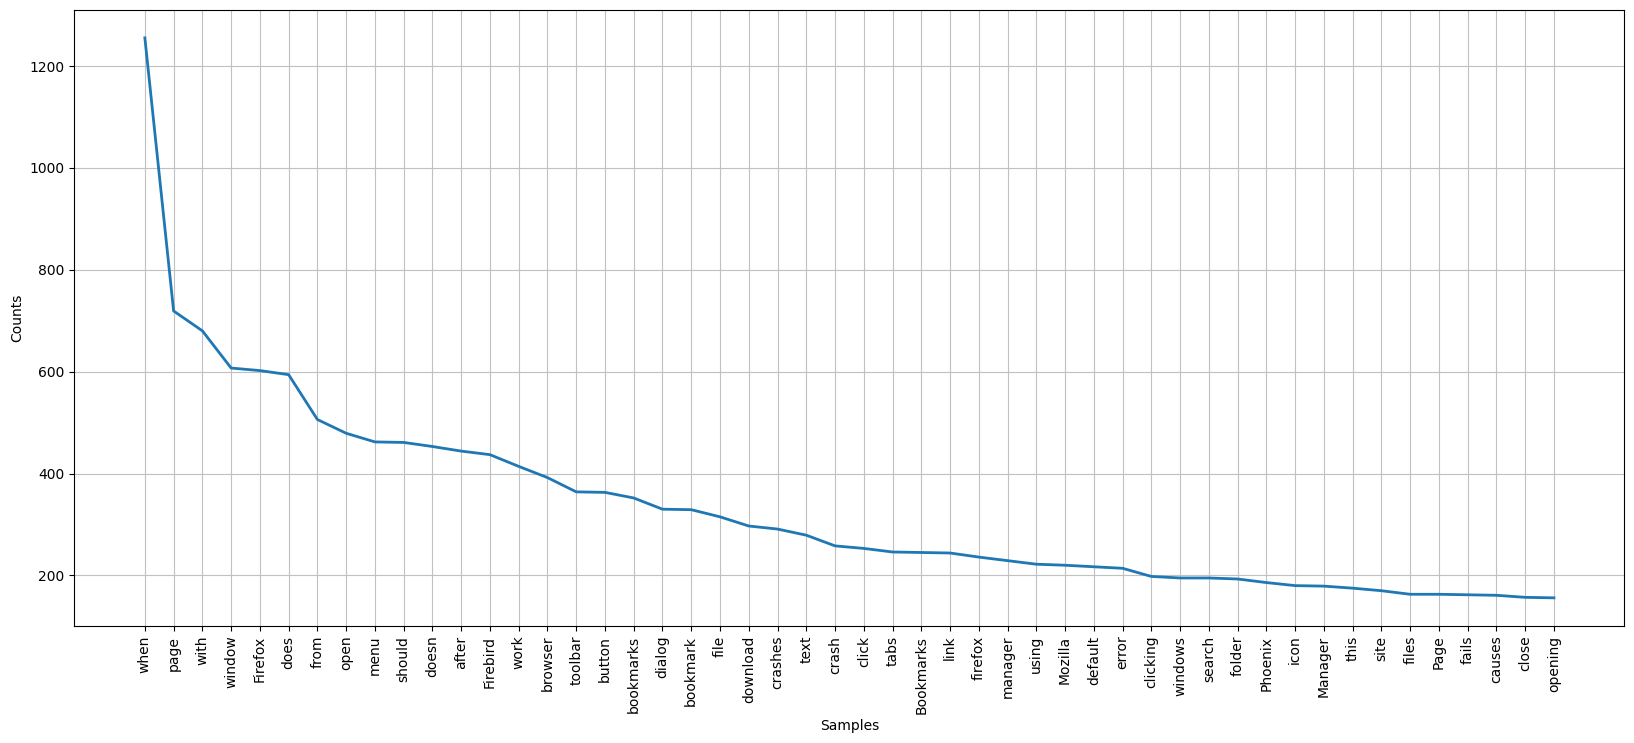

In [118]:
# Import Matplotlib pyplot object
import matplotlib.pyplot as pyplt
pyplt.figure(figsize=(20, 8))
lwords = dict([(k,v) for k,v in fdist.items() if len(k)>3])
fdist = nltk.FreqDist(lwords)
fdist.plot(50,cumulative=False)

<img src="./note.png" width = "" height = "" alt="note" align=left />

Here, we filtered all words longer than 3, i.e. excluding stop words such as the, and, is, and created a tuple dictionary to record the frequency of the words. Based on this dictionary, we visualize it and transform it into a NLTK frequency distribution graph, as shown above.


### **Lab Task3** Text Analysis on Adventures of Sherlock Holmes
In this workshop, we will use the technique we have just learnt to analyse the book Adventures of Sherlock Holmes:
1. Read the Adventures_Holmes.txt text file.
2. Save the content into a string object "holmes_doc".
3. Make use of the stop word technique just learnt tokenize holmes_doc.
4. Generate the list of word tokens with the revmoval of stop words.
5. Use the technique you have just learnt to plot the first 30 most frequenctly appeared words in this literature book.
6. Any special pattern you have found in this detective literature which related to the word distribution. If no, try the first 50 or even 100 ranking words. See what you found.

## 6 Integrate with WordCloud

<img src="./Fig 12.2.jpg" width = "500" height = "" alt="note" align=center />

### What is WordCloud?
- Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

- A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

- Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, from blog posts to databases. They can also help business users compare and contrast two different pieces of text to find the wording similarities between the two.

Glad to tell you that Python provide built-in WordCloud package "WordCloud".

So, From the frequency distribution, we can generate a word cloud, to get an intuitive visualization of the words used in the text.

For this, we have to install the wordcloud Python package, as follows:
#### pip install wordcloud

We can generate word clouds by placing words on a canvas randomly, with sizes proportional to their frequency in the text. We will now look at the code for displaying the word cloud:

In [119]:
# Import WordCloud as wCloud
from wordcloud import WordCloud as wCloud

In [120]:
wcld = wCloud().generate_from_frequencies(fdist)

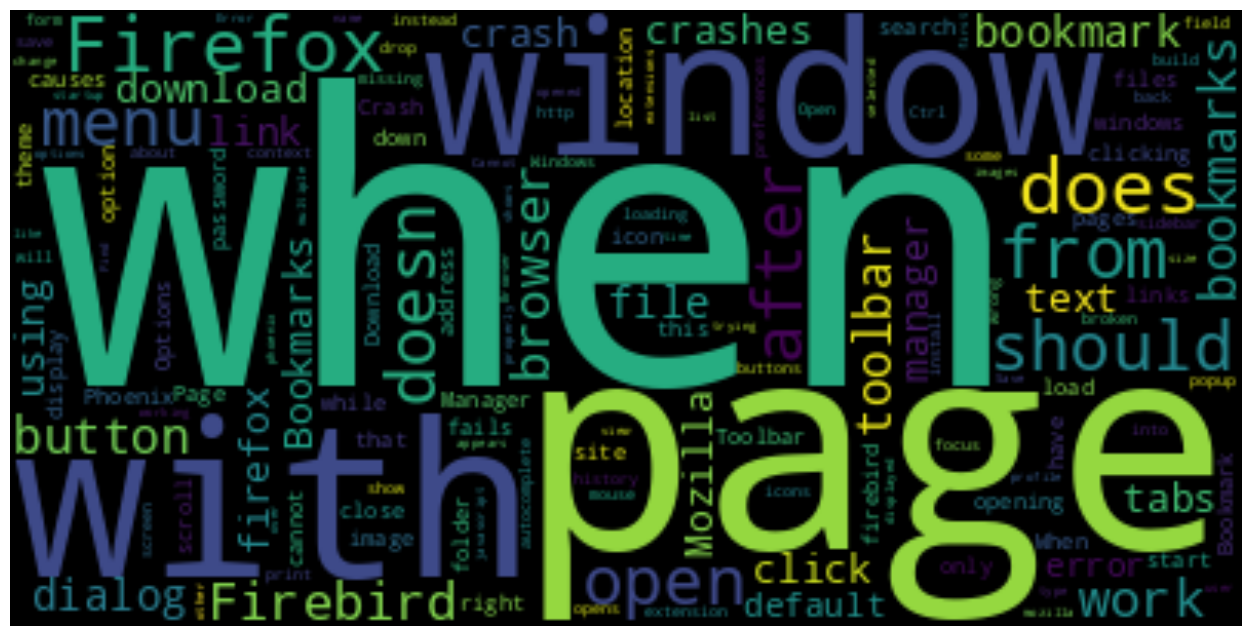

In [121]:
import matplotlib.pyplot as pyplt
pyplt.figure(figsize=(20, 8))
pyplt.imshow(wcld, interpolation='bilinear')
pyplt.axis("off")
pyplt.show()

<img src="./workshop.png" width = "" height = "" alt="note" align=left />

### **Lab Task 4** WordCloud for Adventures of Sherlock Holmes
In this workshop, we try to use create the Wordcloud for the literature Adventures of Sherlock Holmes:
1. Read the Adventures_Holmes.txt text file.
2. Save the content into a string object "holmes_doc".
3. Make use of the stop word technique just learnt tokenize holmes_doc.
4. Generate the list of word tokens with the revmoval of stop words.
5. Extract the TOP 100 most frequently appeared words in this detective story.
6. Generate the Wordcloud for this detective story.

## 7 POS Tagging

In the above section, we analyzed and implemented some basic NLP preprocessing tasks, such as tokenization, stemming and stop word removal. As well as explored how to determine the word distribution in a text corpus and generate a visual picture of it using a word cloud. In this section, we will take a deeper look at POS tagging in NLTK.

### 7.1 What is POS tagging?
- POS refers to categorizing the words in a sentence into specific syntactic or grammatical functions.
- In English, the main parts of speech are nouns, pronouns, adjectives, verbs,adverbs, prepositions, determiners, and conjunctions. POS tagging is the task of attaching one of these categories to each of the words or tokens in a text.
- NLTK provides both a set of tagged text corpus and a set of POS trainers for creating custom taggers.
- The most common tagged datasets in NLTK are the Penn Treebank and Brown Corpus.
- The Penn Treebank consists of a parsed collection of texts from journal articles, telephone conversations, and so on.
- Similarly, the Brown Corpus consists of text from 15 different categories of articles (science, politics, religion, sports, and so on).

### 7.2 Universal Part-of-Speech Tagset

To facilitate future research in unsupervised induction of syntactic structure and to standardize best-practices, we propose a tagset that consists of twelve universal part-of-speech categories.

In addition to the tagset, a mapping from 25 different treebank tagsets to this universal set. As a result, when combined with the original treebank data, this universal tagset and mapping produce a dataset consisting of common parts-of-speech for 22 different languages.

The following is the table of Universal POS Tagset in English.

<img src="./Fig 12.3.jpg" width = "500" height = "" alt="note" align=center />


### 7.3 PENN Treebank Tagset (English & Chinese)

The English Penn Treebank tagset is used with English corpora annotated by the TreeTagger tool, developed by Helmut Schmid in the TC project at the Institute for Computational Linguistics of the University of Stuttgart.

<img src="./Fig 12.4.jpg" width = "600" height = "" alt="note" align=center />

See a more recent version of this tagset can be found here:
https://www.sketchengine.eu/english-treetagger-pipeline-2/

Check here for the Chinese Penn Treebank part-of-speech Tagset:
https://www.sketchengine.eu/chinese-penn-treebank-part-of-speech-tagset/

NLTK also provides mapping from a tagged corpus (such as the Brown Corpus) to the universal tags, as shown in the following code.

The Brown Corpus has a finer granularity of POS tags than the universal tag set.

For example, the tags VBD (for past tense verb) and VB (for base form verb) map to just VERB in the universal tag set:

In [122]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [123]:
# Import Brown Corpus as bwn
from nltk.corpus import brown as bwn

In [124]:
bwn.tagged_words()[0:30]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.'),
 ('The', 'AT'),
 ('jury', 'NN'),
 ('further', 'RBR'),
 ('said', 'VBD'),
 ('in', 'IN')]

<img src="./note.png" width = "" height = "" alt="note" align=left />

In the example code above, the word "Fulton" is tagged as NP-TL, a proper noun (NP) that appears in the context of a title (TL) in the Brown corpus.

This is mapped to NOUN in the universal tag set. Some NLP tasks may need these fine-grained categories, instead of the general universal tags.

### 7.4 Applications of POS tagging

- POS tagging finds applications in Named Entity Recognition (NER), sentiment analysis,question answering, and word sense disambiguation.
- We will look at an example of word sense disambiguation in the following code.
- In the sentences: I left the room and Left of the room, the word "left" carries different meanings.
- A POS tagger would help to differentiate between the two meanings of the word left.
- We will now look at how these two different usages of the same word are tagged:

Try the following and you will see how it works:

In [125]:
# Import word_tokenize as w_tok
from nltk.tokenize import word_tokenize as w_tok
from nltk import pos_tag as p_tag

# Create and tokenizer two sample utterances utt1 and utt2
utt1 = w_tok("Give me a call")
# utt2 = w_tok("Call me later")
utt2 = w_tok("Still your passions. Her fears were stilled.")

Check these utterance POS Tags:

In [126]:
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [127]:
p_tag(utt1,tagset='universal')

[('Give', 'VERB'), ('me', 'PRON'), ('a', 'DET'), ('call', 'NOUN')]

In [128]:
p_tag(utt2, tagset='universal')

[('Still', 'ADV'),
 ('your', 'PRON'),
 ('passions', 'NOUN'),
 ('.', '.'),
 ('Her', 'PRON'),
 ('fears', 'NOUN'),
 ('were', 'VERB'),
 ('stilled', 'VERB'),
 ('.', '.')]

<img src="./note.png" width = "" height = "" alt="note" align=left />

- In text 1, the word call is a noun, whereas it is a verb in text 2.
- In NER, POS tagging helps in identifying a person, place, or location, based on the tags.
- NLTK provides a built-in trained classifier that can identify entities in the text, which works on top of the POS tagged sentences, as shown in the following code:

In [129]:
utt_untag = w_tok("My dad was born in South America")
utt_untag

['My', 'dad', 'was', 'born', 'in', 'South', 'America']

In [130]:
utt_tagged = p_tag(utt_untag)
utt_tagged

[('My', 'PRP$'),
 ('dad', 'NN'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('South', 'NNP'),
 ('America', 'NNP')]

In [131]:
!pip install svgling

In [132]:
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [133]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

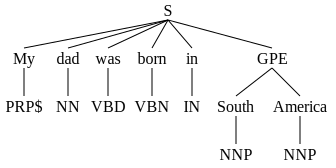

In [134]:
# Import svgling package, use install command to install it if you haven't got this package
import svgling

# Import NLTK.ne_chunk as chunk
from nltk import ne_chunk as chunk

# Display POS Tags chunk
chunk(utt_tagged)

<img src="./note.png" width = "" height = "" alt="note" align=left />

The ne_chunk() function uses the trained named entity chunker to identify South
Africa as a geopolitical entity (GPE), in the example sentence. So far, we have seen
examples using NLTK's built-in taggers. In the next section, we will look at how to develop our own POS tagger.

In [135]:
# Try another example
utt_tok = w_tok("Can you please buy me Haagen-Dazs Icecream? It's $30.8.")
print("Tokens are: ", utt_tok)

Tokens are:  ['Can', 'you', 'please', 'buy', 'me', 'Haagen-Dazs', 'Icecream', '?', 'It', "'s", '$', '30.8', '.']


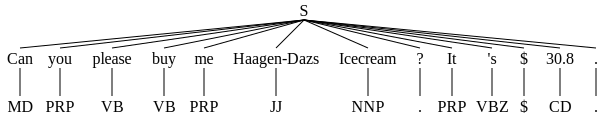

In [136]:
utt_tagged = p_tag(utt_tok)
chunk(utt_tagged)

<img src="./note.png" width = "" height = "" alt="note" align=left />

1. Note that the tokenizer treats 's , '$' , 30.8 , and . as separate tokens. This is important because contractions have their own semantic meaning as well has their own part of speech which brings us to the next part of the NLTK library the POS tagger.
2. The POS tagger in the NLTK library outputs specific tags for certain words.
3. However, it make a mistake in this example. Can you see that?
4. Compare with the following sentence POS Tagging, can you see the problem? Why?

Tokens are:  ['It', 'is', 'not', 'difficult', 'to', 'learn', 'PENN', 'Treebank', 'tagset', '.']


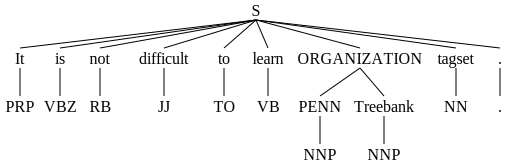

In [137]:
# Try one more example
utt_tok = w_tok("It is not difficult to learn PENN Treebank tagset.")
print("Tokens are: ", utt_tok)
utt_tagged = nltk.pos_tag(utt_tok)
chunk(utt_tagged)


### **Lab Task 5** POS Tagging on  Adventures of Sherlock Holmes
In this workshop, we try to apply the POS Tagging on the literature Adventures of Sherlock Holmes:
1. Read the Adventures_Holmes.txt text file.
2. Save the content into a string object "holmes_doc".
3. Extract THREE typical sentences from The Adventures of Sherlock Holmes from THREE different stories.
4. Apply POS Tagging onto these THREE sentences.
5. Use the ne_chunk function just learnt to display the POS Tagging tree for these THREE sentences.
6. Compare the POS Tags being employed in these example sentences and discuss how it works.

## 12.7 Create your own POS Tagger

- We will now look at training our own POS tagger, using NLTK's tagged set corpora and the sklearn random forest machine learning (ML) model.
- The following example demonstrate a classification task, as we need to predict the POS tag for a given word in a sentence.
- We will utilize the NLTK treebank dataset, with POS tags, as the training or labeled data.
- We will extract the word prefixes and suffixes, and previous and neighboring words in the text, as features for the training.
- These features are good indicators for categorizing words to different parts of speech. The code that follows shows how we can extract these features.
- But before that, make sure we have invoke all neccessary python modules.

In [138]:
# Import all necessary Python packages
import nltk
import numpy as np
from nltk import word_tokenize as w_tok
import matplotlib.pyplot as pyplt
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer as DVect
from sklearn.model_selection import train_test_split as tt_split
from sklearn.ensemble import RandomForestClassifier as RFClassifier
from sklearn.metrics import accuracy_score as a_score
from sklearn.metrics import confusion_matrix as c_matrix

In [139]:
# Define the ufeatures() class
def ufeatures(utt, idx):
    ftdist = {}
    ftdist['word'] = utt[idx]
    ftdist['dist_from_first'] = idx - 0
    ftdist['dist_from_last'] = len(utt) - idx
    ftdist['capitalized'] = utt[idx][0].upper() == utt[idx][0]
    ftdist['prefix1'] = utt[idx][0]
    ftdist['prefix2'] = utt[idx][:2]
    ftdist['prefix3'] = utt[idx][:3]
    ftdist['suffix1'] = utt[idx][-1]
    ftdist['suffix2'] = utt[idx][-2:]
    ftdist['suffix3'] = utt[idx][-3:]
    ftdist['prev_word'] = '' if idx==0 else utt[idx-1]
    ftdist['next_word'] = '' if idx==(len(utt)-1) else utt[idx+1]
    ftdist['numeric'] = utt[idx].isdigit()
    return ftdist

In [140]:
# Define the Retreive Untagged Utterance (RUutterance) class
def RUutterance(utt_tagged):
    [utt,t] = zip(*utt_tagged)
    return list(utt)

In [141]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

<img src="./note.png" width = "" height = "" alt="note" align=left />

The function ufeatures() tries to convert the input text into a dict object of features, whereas each utterance is passed with the corresponding index of the current token word, for which the features is extracted. Later in this example, we will use the treebank tagged utterances, with the universal tags as the labeled and training data:

In [142]:
utt_tagged = nltk.corpus.treebank.tagged_sents(tagset='universal')

In [143]:
utt_tagged

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], ...]

<img src="./note.png" width = "" height = "" alt="note" align=left />

1.	In this example, we apply the universal tags for simplicity.
2.	Of course, one could also use the fine-gained treebank POS Tags for implementation as well.
3.	Once do so, we can now extract the features for each tagged utterance in the corpus, together with the training labels.


We will use the following code to extract the features:

In [144]:
# Define Extract Feature class (exfeatures)
def exfeatures(utt_tag):
    utt, tag = [], []

    for ut in utt_tag:
        for idx in range(len(ut)):
            utt.append(ufeatures(RUutterance(ut), idx))
            tag.append(ut[idx][1])

    return utt, tag

In [145]:
X,y = exfeatures(utt_tagged)

In this example, we use DVect to convert the feature-value dictionary into the training vectors.

For example, if the number of possible values for the suffix3 feature is 40, then there will be 40 features in the output. We will use the following code to apply to the DVect:


In [146]:
# Define sample size
nsize = 10000

# Invoke Dict Vectorizer
dvect = DVect(sparse=False)

Xtran = dvect.fit_transform(X[0:nsize])
ysap  = y[0:nsize]

In this example, we apply a sample size of 10000 utterances. In which 80% of the dataset is used for training and the other 20% is used for testing. The RF (Random Forecast) Classifier is used as the POS Tagger model, as shown:

In [147]:
Xtrain,Xtest,ytrain,ytest = tt_split(Xtran, ysap, test_size=0.2, random_state=123)

In [148]:
rfclassifier = RFClassifier(n_jobs=4)
rfclassifier.fit(Xtrain,ytrain)

RandomForestClassifier(n_jobs=4)

After the system training, we can perform the POS Tagger valida-tion by using some sample utterances. But before passing to the ptag_predict() method, we need to extract the features by using the ufeatures() method, as shown:

In [149]:
# Define the POS Tags Predictor class (ptag_predict)
def ptag_predict(utt):
    utt_tagged = []
    fts = [ufeatures(utt, idx) for idx in range(len(utt))]
    fts = dvect.transform(fts)
    tgs = rfclassifier.predict(fts)
    return zip(utt, tgs)

In these statements, we try to convert the utterance into its corre-sponding features, by using the ufeatures() method. The dictionary of features being extracted from this method is vectorized by ap-plying the previously trained dvect:

In [150]:
# Test with a sample utterance (utt3)
utt3 = "It is an example for POS tagger"
for utt_tagged in ptag_predict(utt3.split()):
    print(utt_tagged)

('It', np.str_('PRON'))
('is', np.str_('VERB'))
('an', np.str_('DET'))
('example', np.str_('NOUN'))
('for', np.str_('ADP'))
('POS', np.str_('NOUN'))
('tagger', np.str_('NOUN'))


<img src="./note.png" width = "" height = "" alt="note" align=left />

In the above statement, we try to use a sample utterance “utt3” as test utterance and invoke the ptag_predict() method, which will output the tags for each of the word tokens inside utt3. After that, we can check for the accuracy.

In [151]:
predict = rfclassifier.predict(Xtest)

In [152]:
a_score(ytest,predict)

0.9345

<img src="./note.png" width = "" height = "" alt="note" align=left />

The overall a_score (accuracy) is around 93.6% which is rather good indeed. Next, we can have a look on the confusion matrix (c-mat) to check how well the POS Tagger performs.

In [153]:
c_mat = c_matrix(ytest,predict)

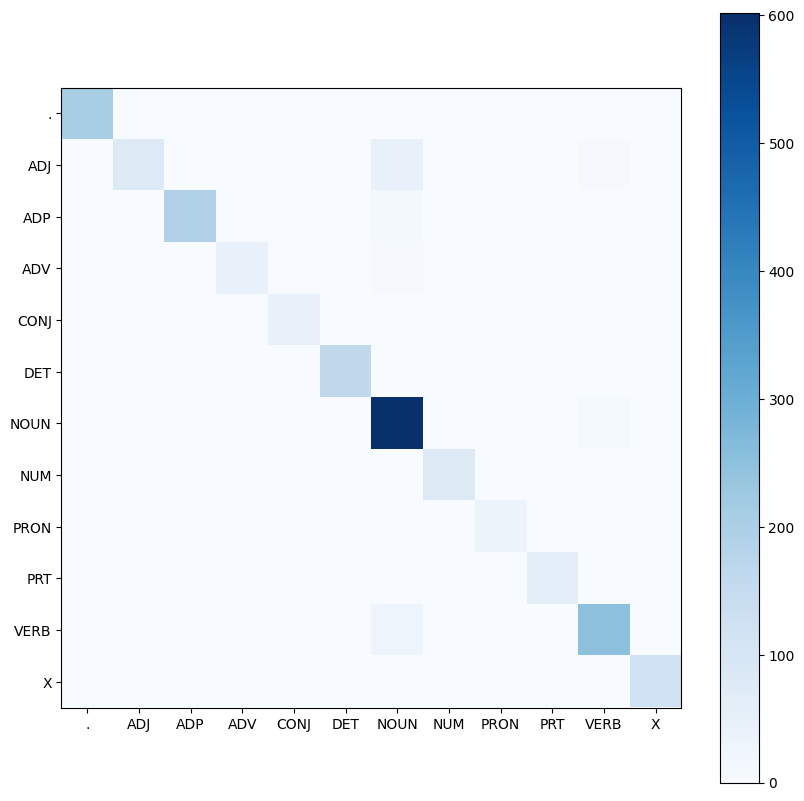

In [154]:
pyplt.figure(figsize=(10,10))
pyplt.xticks(np.arange(len(rfclassifier.classes_)),rfclassifier.classes_)
pyplt.yticks(np.arange(len(rfclassifier.classes_)),rfclassifier.classes_)
pyplt.imshow(c_mat,cmap=pyplt.cm.Blues)
pyplt.colorbar()

<img src="./note.png" width = "" height = "" alt="note" align=left />

In order to create the c-mat (confusion matrix), we apply the clas-ses from the RF classifier as the x and y labels. These labels are the POS tags we used for system training. The plot that follows shows the pictorial representation of the confusion matrix.

It looks like the tagger performs relatively well for nouns, verbs, and determiners in
sentences, which can be seen in the dark regions in the plot. We will now look at the top
features of the model, with the help of the following code:

In [155]:
flist = zip(dvect.get_feature_names_out(),rfclassifier.feature_importances_)
sfeatures = sorted(flist,key=lambda x: x[1], reverse=True)
print(sfeatures[0:20])

[('dist_from_last', np.float64(0.01755299792236181)), ('prefix1=*', np.float64(0.015237043103214469)), ('capitalized', np.float64(0.014584057624481415)), ('suffix2=ed', np.float64(0.012679278076816148)), ('prefix2=th', np.float64(0.011863014795306185)), ('prefix3=the', np.float64(0.011188046110151957)), ('prefix2=,', np.float64(0.01002436386821681)), ('suffix1=d', np.float64(0.009792241621220726)), ('dist_from_first', np.float64(0.009565968360832256)), ('word=the', np.float64(0.009222959929339927)), ('suffix2=,', np.float64(0.008868227819054943)), ('suffix2=he', np.float64(0.008566297771102727)), ('suffix3=the', np.float64(0.008487504686254487)), ('numeric', np.float64(0.00822022941578007)), ('prefix1=,', np.float64(0.008015737354445652)), ('prefix1=.', np.float64(0.0077989219585560595)), ('word=,', np.float64(0.007796822586506201)), ('suffix1=s', np.float64(0.007632642230586472)), ('next_word=', np.float64(0.006657224657918732)), ('prefix2=*-', np.float64(0.006121186931089904))]


<img src="./note.png" width = "" height = "" alt="note" align=left />

- The random forest feature importance is stored in the Python feature_importances list. - We will sort this list in descending order of feature importance, and will print the top 20 features.
- You can see that some of the suffix features get higher importance scores.
- For example, words ending with ed are usually verbs in the past tense. We also find that some punctuation, such as commas, influence the tagging.
- Though POS tagging is also a type of text classification, we will look at the next most common NLP task, which is sentiment classification.

<img src="./workshop.png" width = "" height = "" alt="note" align=left />

### Workshop 12.6 Revisit POS Tagging on  Adventures of Sherlock Holmes with Additional Tagger
In this workshop, we try to apply the POS Tagging on the literature Adventures of Sherlock Holmes:
1. Read the Adventures_Holmes.txt text file.
2. Save the content into a string object "holmes_doc".
3. Extract THREE typical sentences from The Adventures of Sherlock Holmes from THREE different stories.
4. By using the method just learnt, create your own POS Tagger to tailor for detective stories like Sherlock Holmes. What are the new POS tags you will add (use)?
5. Try your new POS Tagger for these THREE typical sentences and compare the results with the previous workshop.

Adventures_Holmes.txt not found. Please upload the file.
POS Tagging with the trained tagger:

Sentence 1:
To: ADP
the: DET
curious: NOUN
incident: NOUN
of: ADP
the: DET
dog: NOUN
in: ADP
the: DET
night-time: NOUN
.: .

Sentence 2:
Elementary: NOUN
,: .
my: NOUN
dear: NOUN
Watson: NOUN
.: .

Sentence 3:
Data: NOUN
!: NOUN
Data: NOUN
!: NOUN
Data: NOUN
!: NOUN
I: NOUN
ca: NOUN
n't: ADV
make: VERB
bricks: NOUN
without: ADP
clay: NOUN
.: .

Named Entity Chunking with NLTK's default tagger:

Sentence 1:


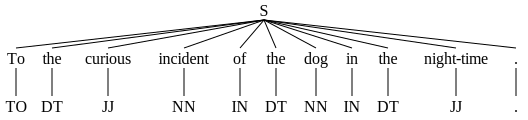


Sentence 2:


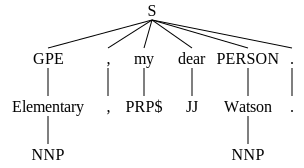


Sentence 3:


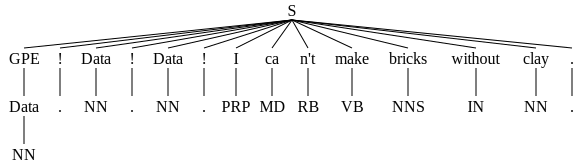

In [156]:

!pip install nltk
!pip install svgling # Ensure svgling is installed here as well

# Import the nltk module
import nltk
from IPython.display import display # Import display for chunk output
import svgling # Explicitly import svgling

try:
    nltk.data.find('tokenizers/punkt')
except (LookupError, Exception) as e: # Catch LookupError or general Exception
    print(f"NLTK data 'punkt' not found or error during check: {e}. Downloading...")
    nltk.download('punkt')

try:
    nltk.data.find('tokenizers/punkt_tab')
except (LookupError, Exception) as e:
    print(f"NLTK data 'punkt_tab' not found or error during check: {e}. Downloading...")
    nltk.download('punkt_tab')

try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except (LookupError, Exception) as e:
    print(f"NLTK data 'averaged_perceptron_tagger' not found or error during check: {e}. Downloading...")
    nltk.download('averaged_perceptron_tagger')

# Add this line to download the specific tagger resource required by nltk.pos_tag
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except (LookupError, Exception) as e:
    print(f"NLTK data 'averaged_perceptron_tagger_eng' not found or error during check: {e}. Downloading...")
    nltk.download('averaged_perceptron_tagger_eng')


try:
    nltk.data.find('taggers/universal_tagset')
except (LookupError, Exception) as e:
    print(f"NLTK data 'universal_tagset' not found or error during check: {e}. Downloading...")
    nltk.download('universal_tagset')

try:
    # Explicitly check for the required chunker resource
    nltk.data.find('chunkers/maxent_ne_chunker_tab')
except (LookupError, Exception) as e:
    print(f"NLTK data 'maxent_ne_chunker_tab' not found or error during check: {e}. Downloading...")
    nltk.download('maxent_ne_chunker_tab') # Download the specific missing resource

try:
    nltk.data.find('corpora/words')
except (LookupError, Exception) as e:
    print(f"NLTK data 'words' not found or error during check: {e}. Downloading...")
    nltk.download('words')

# 1. Read the Adventures_Holmes.txt text file.
# Assuming 'Adventures_Holmes.txt' is in the same directory as your notebook
try:
    with open('Adventures_Holmes.txt', 'r', encoding='utf-8') as f:
        holmes_doc = f.read()
except FileNotFoundError:
    print("Adventures_Holmes.txt not found. Please upload the file.")
    holmes_doc = "" # Initialize as empty string to avoid errors

# 2. Save the content into a string object "holmes_doc".
# This is already done in step 1

# 3. Extract THREE typical sentences from The Adventures of Sherlock Holmes
# You will need to manually identify and extract these sentences.
# Replace the placeholder sentences with actual sentences from the text.
sentence1 = "To the curious incident of the dog in the night-time."
sentence2 = "Elementary, my dear Watson."
sentence3 = "Data! Data! Data! I can't make bricks without clay."


# For this workshop, we assume they have been successfully run.
def ptag_predict_custom(utt):
    utt_tagged = []
    try:
        # Ensure ufeatures is defined from the previous section
        fts = [ufeatures(utt, idx) for idx in range(len(utt))]
        # Ensure dvect is defined and fitted from the previous section
        fts = dvect.transform(fts)
        # Ensure rfclassifier is defined and fitted from the previous section
        tgs = rfclassifier.predict(fts)
        return zip(utt, tgs)
    except NameError as e:
        print(f"Error: {e}. Please ensure ufeatures, dvect, and rfclassifier are defined by running the code cells in section '12.7 Create your own POS Tagger'.")
        return [] # Return empty list to prevent further errors

# 5. Try your new POS Tagger for these THREE typical sentences and compare the results with the previous workshop.

print("POS Tagging with the trained tagger:")
print("\nSentence 1:")
for word, tag in ptag_predict_custom(nltk.word_tokenize(sentence1)):
    print(f"{word}: {tag}")

print("\nSentence 2:")
for word, tag in ptag_predict_custom(nltk.word_tokenize(sentence2)):
    print(f"{word}: {tag}")

print("\nSentence 3:")
for word, tag in ptag_predict_custom(nltk.word_tokenize(sentence3)):
    print(f"{word}: {tag}")



print("\nNamed Entity Chunking with NLTK's default tagger:")
def chunk_sentence(sentence):
    utt_tok = nltk.word_tokenize(sentence)
    # This line now relies on the newly downloaded averaged_perceptron_tagger_eng
    utt_tagged = nltk.pos_tag(utt_tok)
    # Ensure chunk function is imported or defined
    try:
        return chunk(utt_tagged)
    except NameError as e:
        print(f"Error: {e}. Please ensure chunk is imported from nltk.")
        return None

# Import the chunk function
from nltk import ne_chunk as chunk

print("\nSentence 1:")
display(chunk_sentence(sentence1))

print("\nSentence 2:")
display(chunk_sentence(sentence2))

print("\nSentence 3:")
display(chunk_sentence(sentence3))
